In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 1. Импорт и анализ таблиц

In [5]:
client = pd.read_excel('Новый диплом датасет.xlsx', sheet_name = 'Clients')
region = pd.read_excel('Новый диплом датасет.xlsx', sheet_name = 'Region_dict')
data =  pd.read_excel('Новый диплом датасет.xlsx', sheet_name = 'Данные')

In [6]:
client.head()

,id_client,dtime_ad,nflag_test,id_trading_point
0,180844,2022-06-08 18:38:41.414,0,212
1,193942,NaT,0,13
2,226069,2022-07-11 16:28:38.511,1,54
3,183981,2022-06-16 12:23:59.289,1,991
4,322530,2022-07-08 08:56:08.714,0,1015


In [7]:
region.head()

,id_trading_point,city
0,1,Петрозаводск
1,2,Дмитров
2,4,Чехов
3,7,Ростов Великий
4,11,Владимир


In [8]:
data.head()

,id_order,id_client,amt_payment,dtime_pay
0,100238,194569.0,5373.0,2022-10-28 04:05:15.221000
1,100242,191056.0,4151.0,2022-08-01 02:42:54.992000
2,100249,200049.0,5688.0,2022-08-24 12:45:12.744000
3,100258,206161.0,4330.0,2022-12-09 15:13:26.437000
4,100267,190945.0,5488.0,2022-08-03 02:07:31.468000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37989 entries, 0 to 37988
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_order     37989 non-null  int64  
 1   id_client    37401 non-null  float64
 2   amt_payment  35845 non-null  float64
 3   dtime_pay    35828 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ MB


In [10]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_trading_point  66 non-null     int64 
 1   city              66 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [11]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55605 entries, 0 to 55604
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55605 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55605 non-null  int64         
 3   id_trading_point  55605 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.7 MB


In [12]:
# Используем ф-цию isnull(). Функция isnull() для каждого элемента указывает, является ли он NaN (отсутствующим значением) или нет. 
print(data.isnull().sum())
print()
print(client.isnull().sum())
print()
print(region.isnull().sum())

id_order          0
id_client       588
amt_payment    2144
dtime_pay      2161
dtype: int64

id_client             0
dtime_ad            249
nflag_test            0
id_trading_point      0
dtype: int64

id_trading_point    0
city                0
dtype: int64


Таким образом пустые значения есть во вкладках "Данные"(id_client, amt_payment, dtime_pay) и "Клиенты"(dtime_ad).

In [13]:
# Используя ф-цию fillna, заполним пропущенные значений в датафрейме, и пересохраняем датафрейм
# В 'dtime_ad' и 'dtime_pay' заменяем неизвестное время (pd.NaT), в 'id_client' - пропушенные значения, в 'amt_payment' - пустые значения на нули. 
client['dtime_ad'] = client['dtime_ad'].fillna(pd.NaT)

data['id_client'] = data['id_client'].fillna(pd.NA)

data['dtime_pay'] = data['dtime_pay'].fillna(pd.NaT)

data['amt_payment'].fillna(0.0, inplace=True)

client.to_excel('client.xlsx', index=False)
data.to_excel('data.xlsx', index=False)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37989 entries, 0 to 37988
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_order     37989 non-null  int64  
 1   id_client    37401 non-null  float64
 2   amt_payment  37989 non-null  float64
 3   dtime_pay    35828 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ MB


In [15]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55605 entries, 0 to 55604
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55605 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55605 non-null  int64         
 3   id_trading_point  55605 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.7 MB


In [16]:
# мерджим "Клиентов" и "Регионы", чтобы исследовать количество торговых точек в каждом городе
merged_df = pd.merge(client, region)

In [17]:
merged_df.head()

,id_client,dtime_ad,nflag_test,id_trading_point,city
0,180844,2022-06-08 18:38:41.414,0,212,Красноярск
1,223863,2022-08-20 21:56:54.325,0,212,Красноярск
2,201715,2022-07-30 19:07:49.264,1,212,Красноярск
3,292010,2022-07-26 20:37:16.885,1,212,Красноярск
4,190438,2022-07-02 12:53:04.753,1,212,Красноярск


In [18]:
# groupby -  количество торговых точек в каждом городе
city_group = merged_df.groupby('city')['id_trading_point'].count()

city_group

city
Великий Новгород      231
Владимир             1117
Волгоград            1360
Дмитров               149
Казань               5077
Краснодар            4747
Красноярск           5937
Москва              12358
Мурманск             2120
Нижний Новгород       292
Новосибирск          5188
Петрозаводск          167
Ростов Великий        163
Ростов-на-Дону        434
Самара               1648
Санкт-Петербург      8879
Саратов              2122
Сахалинск             153
Сочи                 1602
Тольятти              357
Тюмень                276
Чехов                 142
Ярославль            1086
Name: id_trading_point, dtype: int64

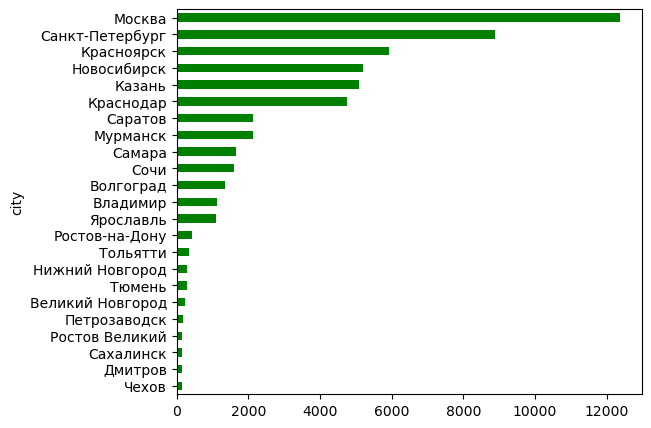

In [19]:
# строим горизонтальную гистограмму 'barh'
city_gr_sort = city_group.sort_values(ascending=True)
city_gr_sort.plot(kind='barh', color = 'g', figsize=(6, 5))
plt.show()

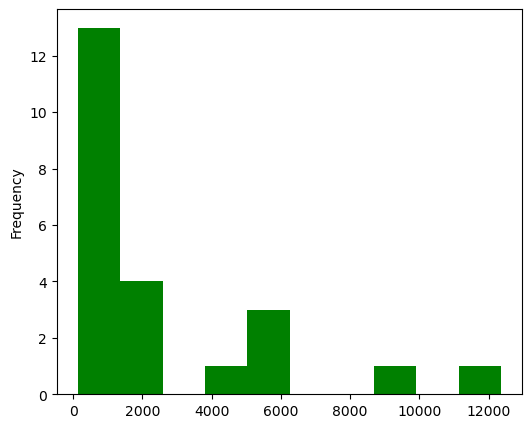

In [20]:
city_gr_sort = city_group.sort_values(ascending=True)
city_gr_sort.plot(kind='hist', color = 'g', figsize=(6, 5))
plt.show()

# 2. Объединение таблиц

In [21]:
#строим датафрейм с суммами платежей на каждого клиента
payments_sum = data.groupby('id_client').agg({'amt_payment': 'sum'})

payments_sum

,amt_payment
id_client,
178561.0,3052.0
178562.0,2439.0
178563.0,768.0
178564.0,0.0
178565.0,958.0
...,...
209630.0,6927.0
209631.0,2090.0
209632.0,2775.0


In [22]:
#соединяем датафрейм с "Клиентами"
payments_merg = pd.merge(client, payments_sum, on='id_client', how='left')

payments_merg

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment
0,180844,2022-06-08 18:38:41.414,0,212,5349.0
1,193942,NaT,0,13,4144.0
2,226069,2022-07-11 16:28:38.511,1,54,NaN
3,183981,2022-06-16 12:23:59.289,1,991,6322.0
4,322530,2022-07-08 08:56:08.714,0,1015,NaN
...,...,...,...,...,...
55600,193038,2022-07-09 00:31:25.196,0,1015,5846.0
55601,244069,2022-08-08 00:12:31.319,1,991,NaN
55602,189084,2022-06-29 04:34:42.610,1,439,7146.0
55603,182758,2022-06-13 11:28:37.856,1,573,13720.0


In [23]:
#заполняем нулями суммы покупок клиентов, которые их не совершали с помощью fillna
payments_merg['amt_payment'] = payments_merg['amt_payment'].fillna(0)

In [66]:
#вприм к датафрейму 'city'
payments_with_city = payments_merg.merge(region, on='id_trading_point', how='left')

payments_with_city

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,city
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,Красноярск
1,193942,NaT,0,13,4144.0,Нижний Новгород
2,226069,2022-07-11 16:28:38.511,1,54,0.0,Мурманск
3,183981,2022-06-16 12:23:59.289,1,991,6322.0,Казань
4,322530,2022-07-08 08:56:08.714,0,1015,0.0,Краснодар
...,...,...,...,...,...,...
55600,193038,2022-07-09 00:31:25.196,0,1015,5846.0,Краснодар
55601,244069,2022-08-08 00:12:31.319,1,991,0.0,Казань
55602,189084,2022-06-29 04:34:42.610,1,439,7146.0,Казань
55603,182758,2022-06-13 11:28:37.856,1,573,13720.0,Санкт-Петербург


In [67]:
#запускаем цикл по колонке 'amt_payment'
#def my_func(amt_payment):
#    if amt_payment == 0:
#        return '0'
#    else:
#        return '1'

In [78]:
#добавляем колонку с флагом
payments_with_city['payment_flag'] = payments_with_city['amt_payment'].apply(lambda x: 1 if x>0 else 0)

payments_with_city

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,city,payment_flag
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,Красноярск,1
1,193942,NaT,0,13,4144.0,Нижний Новгород,1
2,226069,2022-07-11 16:28:38.511,1,54,0.0,Мурманск,0
3,183981,2022-06-16 12:23:59.289,1,991,6322.0,Казань,1
5,254313,2022-06-19 22:18:01.770,1,453,0.0,Санкт-Петербург,0
...,...,...,...,...,...,...,...
55599,188702,2022-06-28 06:16:25.664,0,453,1323.0,Санкт-Петербург,1
55601,244069,2022-08-08 00:12:31.319,1,991,0.0,Казань,0
55602,189084,2022-06-29 04:34:42.610,1,439,7146.0,Казань,1
55603,182758,2022-06-13 11:28:37.856,1,573,13720.0,Санкт-Петербург,1


# 3. Автоматизация статистических вычислений

In [117]:
#используем функции из 5 урока по АБ-тестам
def test_calc(r1, r2, alpha=0.05):
    t_stat, p_val = ttest_ind(r1, r2)
    if p_val < alpha:
        print("Существует статистическая разница между средними значениями")
    else:
        print("Нет статистической разницы между средними значениями")
    print(f"Значение t-критерия: {t_stat}")
    print(f"Значение p-value: {p_val}")

In [118]:
#создаем функцию, рассчитывающую значения критерия Манна-Уитни
def mann_whitney_func(r1, r2, alpha=0.05):
    stat, p_val = mannwhitneyu(r1, r2)
    if p_val < alpha:
        print("Существует статистическая разница между выборками")
    else:
        print("Нет статистической разницы между выборками")
    print(f"Значение критерия Манна-Уитни: {stat}")
    print(f"Значение p-value: {p_val}")

In [119]:
r1 = payments_with_city[payments_with_city['nflag_test']== 1]
r2 = payments_with_city[payments_with_city['nflag_test']== 0]

In [120]:
test_calc(r1['amt_payment'], r2['amt_payment'])
mann_whitney_func(r1['amt_payment'], r2['amt_payment'])

Существует статистическая разница между средними значениями
Значение t-критерия: 7.276120451887521
Значение p-value: 3.489166865988976e-13
Существует статистическая разница между выборками
Значение критерия Манна-Уитни: 285421891.0
Значение p-value: 1.7375252140520593e-13


#Значения в контрольной и тестируемой группе статистически неравны

# 4. Чистка неверно заполненных точек 

In [121]:
#Запускаем цикл для точек с пустыми продажами и цикл c пустыми/неверно заполненными группами
empty_list_1 = []
empty_list_2 = []

for x in payments_with_city['id_trading_point'].unique():
    sales = payments_with_city.loc[(payments_with_city['id_trading_point'] == x) & (payments_with_city['amt_payment'] > 0), 'amt_payment'].sum()
    if sales == 0:
        empty_list_1.append(x)
        
for x in payments_with_city['id_trading_point'].unique():
    nflag_test = r1.loc[r1['id_trading_point'] == x, 'nflag_test'].unique()
    nflag_control = r2.loc[r2['id_trading_point'] == x, 'nflag_test'].unique()
    if len(nflag_test) != 1 or len(nflag_control) != 1 or nflag_test[0] != 1 or nflag_control[0] != 0:
        empty_list_2.append(x)       

In [122]:
empty_list_1

[]

In [123]:
empty_list_2

[]

In [124]:
empty_list = list(set(empty_list_1 + empty_list_2))
empty_list

[]

# 5. Расчет общих результатов АБ Теста

In [125]:
# убираем из датафрейма неверные торговые точки, полученный в пункте выше
payments_with_city.drop(payments_with_city[payments_with_city['id_trading_point'].isin(empty_list)].index, inplace=True)

payments_with_city_group = payments_with_city.groupby('city')['id_trading_point'].count()
payments_with_city_group

city
Великий Новгород      231
Владимир             1117
Волгоград            1360
Дмитров               149
Казань               5077
Краснодар            2163
Красноярск           5937
Москва              12358
Мурманск             2120
Нижний Новгород       292
Самара               1648
Санкт-Петербург      8879
Саратов              2122
Сахалинск             153
Сочи                 1602
Тольятти              357
Тюмень                276
Ярославль            1086
Name: id_trading_point, dtype: int64

In [126]:
test_group = payments_with_city[payments_with_city['nflag_test'] == 1]['amt_payment']
control_group = payments_with_city[payments_with_city['nflag_test'] == 0]['amt_payment']

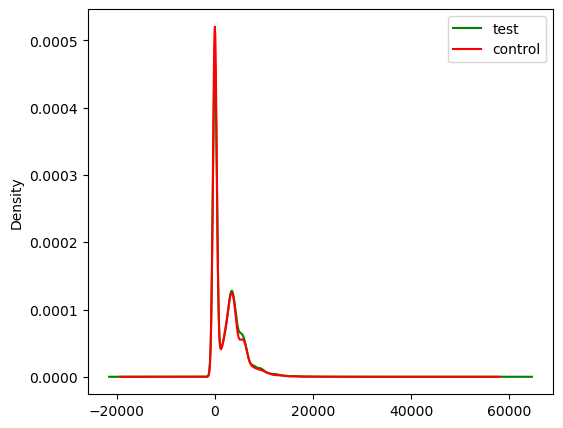

In [127]:
#строим график
test_group.plot(kind='kde', color = 'g', label='test', figsize=(6, 5))
control_group.plot(kind='kde', color = 'r', label='control', figsize=(6, 5))
plt.legend(loc='upper right')
plt.show()

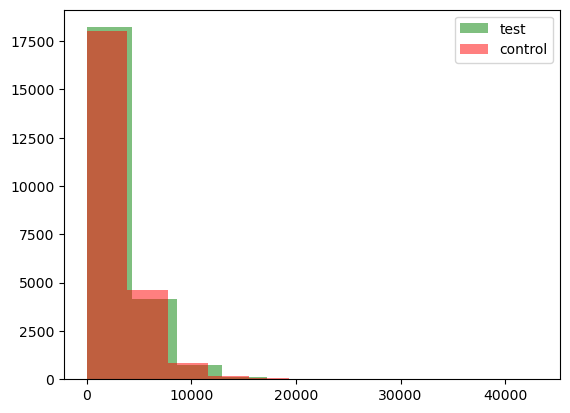

In [128]:
# строим гистограмму
plt.hist(test_group, bins=10, alpha=0.5, label='test', color = 'g')
plt.hist(control_group, bins=10, alpha=0.5, label='control', color = 'r')
plt.legend(loc='upper right')
plt.show()

In [129]:
# запускаем функцию test_calc
test_calc(payments_with_city['amt_payment'], payments_with_city['nflag_test'])

Существует статистическая разница между средними значениями
Значение t-критерия: 167.9115977145547
Значение p-value: 0.0


Значения статистически не равны

In [130]:
r1 = np.where(payments_with_city[payments_with_city['nflag_test'] == 1]['amt_payment'] > 0, 1, 0)
r2 = np.where(payments_with_city[payments_with_city['nflag_test'] == 0]['amt_payment'] > 0, 1, 0)

In [131]:
test_calc(r1, r2)

Существует статистическая разница между средними значениями
Значение t-критерия: 6.18364092301134
Значение p-value: 6.315477502328519e-10


In [132]:
mann_whitney_func(test_group, control_group)

Существует статистическая разница между выборками
Значение критерия Манна-Уитни: 285421891.0
Значение p-value: 1.7375252140520593e-13


Cтатистически значимая разница между группами "тест" и "контроль" существует. 
Значение p-value для обеих функций оказалось меньше 5%,
и таким образом нулевая гипотеза отвергнута 
в пользу альтернативной гипотезы.
По результатам A/B-тестирования мы можем заключить - применение пуш-уведомлений может привести к статистически значимому увеличению платежей.

# 6. Сегментация результатов АБ Теста

In [133]:
#создаем датафрейм для Москвы
df_moscow = payments_with_city[payments_with_city['city'] == 'Москва'].copy()

In [134]:
#рассчитываем t-тест для Москвы
conv_test_moscow = df_moscow[df_moscow['nflag_test'] == 1]['amt_payment'].mean()
conv_control_moscow = df_moscow[df_moscow['nflag_test'] == 0]['amt_payment'].mean()

alpha = 0.05
results_moscow = stats.ttest_ind(df_moscow[df_moscow['nflag_test'] == 1]['amt_payment'], 
                                df_moscow[df_moscow['nflag_test'] == 0]['amt_payment'], equal_var=False)

if (results_moscow.pvalue < alpha) and (conv_test_moscow > conv_control_moscow):
    print("В Москве существует статистическая разница между средними значениями")
    print("Значение t-критерия:", round(results_moscow.statistic, 3))
    print("Значение p-value:", results_moscow.pvalue)
else:
    print("В Москве существует статистически незначимая разница между средними значениями")

В Москве существует статистическая разница между средними значениями
Значение t-критерия: 7.892
Значение p-value: 3.236345423179877e-15


In [135]:
# рассчитываем критерий Манна-Уитни для Москвы
alpha = 0.05
results_mannwhitney_moscow = stats.mannwhitneyu(df_moscow[df_moscow['nflag_test'] == 1]['amt_payment'], 
                                                df_moscow[df_moscow['nflag_test'] == 0]['amt_payment'])

if (results_mannwhitney_moscow.pvalue < alpha) and (conv_test_moscow > conv_control_moscow):
    print("В Москве существует статистическая разница между выборками")
    print("Значение критерия Манна-Уитни:", results_mannwhitney_moscow.statistic)
    print("Значение p-value:", results_mannwhitney_moscow.pvalue)
else:
    print("В Москве существует статистически незначимая разница между выборками")

В Москве существует статистическая разница между выборками
Значение критерия Манна-Уитни: 20643197.5
Значение p-value: 8.651256576787724e-17


In [136]:
#рассчитываем конверсия для контрольной и тестовой групп в Москве
df_moskow_copy = df_moscow.copy()
conv_test_moskow = df_moscow[df_moscow['nflag_test'] == 1]['amt_payment'].mean()
conv_control_moskow = df_moscow[df_moscow['nflag_test'] == 0]['amt_payment'].mean()
print("Средняя конверсия в группе test в Москве:", round(conv_test_moskow, 3))
print("Средняя конверсия в группе control в Москве:", round(conv_control_moskow, 3))

Средняя конверсия в группе test в Москве: 2379.234
Средняя конверсия в группе control в Москве: 1986.181


In [137]:
#те же операции проделываем для Спб
df_piter = payments_with_city[payments_with_city['city'] == 'Санкт-Петербург'].copy()

In [138]:
conv_test_piter = df_piter[df_piter['nflag_test'] == 1]['amt_payment'].mean()
conv_control_piter = df_piter[df_piter['nflag_test'] == 0]['amt_payment'].mean()

alpha = 0.05
results_piter = stats.ttest_ind(df_piter[df_piter['nflag_test'] == 1]['amt_payment'], 
                                df_piter[df_piter['nflag_test'] == 0]['amt_payment'], equal_var=False)

if (results_piter.pvalue < alpha) and (conv_test_piter > conv_control_piter):
    print("В Санкт-Петербурге существует статистическая разница между средними значениями")
    print("Значение t-критерия:", round(results_piter.statistic, 3))
    print("Значение p-value:", results_piter.pvalue)
else:
    print("В Санкт-Петербурге существует статистически незначимая разница между средними значениями")

В Санкт-Петербурге существует статистическая разница между средними значениями
Значение t-критерия: 8.761
Значение p-value: 2.303567502922061e-18


In [139]:
alpha = 0.05
results_mannwhitney_piter = stats.mannwhitneyu(df_piter[df_piter['nflag_test'] == 1]['amt_payment'], 
                                                df_piter[df_piter['nflag_test'] == 0]['amt_payment'])

if (results_mannwhitney_piter.pvalue < alpha) and (conv_test_piter > conv_control_piter):
    print("В Санкт-Петербурге существует статистическая разница между выборками")
    print("Значение критерия Манна-Уитни:", results_mannwhitney_piter.statistic)
    print("Значение p-value:", results_mannwhitney_piter.pvalue)
else:
    print("В Санкт-Петербурге существует статистически незначимая разница между выборками")

В Санкт-Петербурге существует статистическая разница между выборками
Значение критерия Манна-Уитни: 10899685.5
Значение p-value: 2.0392184217953754e-20


In [140]:
df_piter_av = df_piter.copy()
conv_test_piter = df_piter[df_piter['nflag_test'] == 1]['amt_payment'].mean()
conv_control_piter = df_piter[df_piter['nflag_test'] == 0]['amt_payment'].mean()
print("Средняя конверсия в группе test в Санкт-Петербурге:", round(conv_test_piter, 3))
print("Средняя конверсия в группе control в Санкт-Петербурге:", round(conv_control_piter, 3))

Средняя конверсия в группе test в Санкт-Петербурге: 2427.463
Средняя конверсия в группе control в Санкт-Петербурге: 1913.559


In [141]:
cities  = payments_with_city['city'].unique()
cities  = [c for c in cities if c not in ['Москва', 'Санкт-Петербург']]

In [142]:
#запускаем цикл для всех городов, кроме Мск и Спб для рассчета t-теста
for city in cities:
    df_city = payments_with_city[payments_with_city['city'] == city].copy()
    conv_test_city = df_city[df_city['nflag_test'] == 1]['amt_payment'].mean()
    conv_ctrl_city = df_city[df_city['nflag_test'] == 0]['amt_payment'].mean()
    alpha = 0.05
    results_city = stats.ttest_ind(df_city[df_city['nflag_test'] == 1]['amt_payment'], 
                                    df_city[df_city['nflag_test'] == 0]['amt_payment'], equal_var=False)
    if (results_city.pvalue < alpha) and (conv_test_city > conv_ctrl_city):
        print("В городе " + str(city) + " существует статистическая разница между средними значениями")
        print("Значение t-критерия:", round(results_city.statistic, 3))
        print("Значение p-value:", results_city.pvalue)
    else:
        print("В городе", city, "существует статистически незначимая разница между средними значениями")

В городе Красноярск существует статистически незначимая разница между средними значениями
В городе Нижний Новгород существует статистически незначимая разница между средними значениями
В городе Мурманск существует статистически незначимая разница между средними значениями
В городе Казань существует статистически незначимая разница между средними значениями
В городе Ярославль существует статистически незначимая разница между средними значениями
В городе Саратов существует статистически незначимая разница между средними значениями
В городе Тольятти существует статистически незначимая разница между средними значениями
В городе Тюмень существует статистически незначимая разница между средними значениями
В городе Волгоград существует статистически незначимая разница между средними значениями
В городе Сочи существует статистически незначимая разница между средними значениями
В городе Владимир существует статистическая разница между средними значениями
Значение t-критерия: 2.548
Значение p-va

#Только в городах Владимир и Самара существует статистическая разница между значениями

In [143]:
#запускаем цикл для всех городов, кроме Мск и Спб, для рассчета Манна-Уитни
for city in cities:
    df_city = payments_with_city[payments_with_city['city'] == city].copy()
    conv_test_city = df_city[df_city['nflag_test'] == 1]['amt_payment'].mean()
    conv_ctrl_city = df_city[df_city['nflag_test'] == 0]['amt_payment'].mean()
    alpha = 0.05
    results_mannwhitney = stats.mannwhitneyu(df_city[df_city['nflag_test'] == 1]['amt_payment'], 
                                    df_city[df_city['nflag_test'] == 0]['amt_payment'])
    if (results_mannwhitney.pvalue < alpha) and (conv_test_city > conv_ctrl_city):
        print("В городе " + str(city) + " существует статистическая разница между средними значениями")
        print("Значение критерия Манна-Уитни:", results_mannwhitney.statistic)
        print("Значение p-value:", results_mannwhitney.pvalue)
    else:
        print("В городе", city, "существует статистически незначимая разница между средними значениями")

В городе Красноярск существует статистически незначимая разница между средними значениями
В городе Нижний Новгород существует статистически незначимая разница между средними значениями
В городе Мурманск существует статистически незначимая разница между средними значениями
В городе Казань существует статистически незначимая разница между средними значениями
В городе Ярославль существует статистически незначимая разница между средними значениями
В городе Саратов существует статистически незначимая разница между средними значениями
В городе Тольятти существует статистически незначимая разница между средними значениями
В городе Тюмень существует статистическая разница между средними значениями
Значение критерия Манна-Уитни: 10741.0
Значение p-value: 0.038066216007540725
В городе Волгоград существует статистически незначимая разница между средними значениями
В городе Сочи существует статистически незначимая разница между средними значениями
В городе Владимир существует статистическая разниц

#В городах Тюмень, Владимир и самара существует статистически значимая разница между значениями

In [144]:
#запускаем цикл для рассчета конверции
for city in cities:
    df_city = payments_with_city[payments_with_city['city'] == city].copy()
    conv_test_city = df_city[df_city['nflag_test'] == 1]['amt_payment'].mean()
    conv_control_city = df_city[df_city['nflag_test'] == 0]['amt_payment'].mean()
    print(("Средняя конверсия в группе test в городе " + str(city) + ":"), round(conv_test_city, 3))
    print(("Средняя конверсия в группе control в городе" + str(city) + ":"), round(conv_control_city, 3))

Средняя конверсия в группе test в городе Красноярск: 2437.496
Средняя конверсия в группе control в городеКрасноярск: 2428.778
Средняя конверсия в группе test в городе Нижний Новгород: 1970.549
Средняя конверсия в группе control в городеНижний Новгород: 2336.187
Средняя конверсия в группе test в городе Мурманск: 1865.271
Средняя конверсия в группе control в городеМурманск: 1857.22
Средняя конверсия в группе test в городе Казань: 2733.942
Средняя конверсия в группе control в городеКазань: 2610.688
Средняя конверсия в группе test в городе Ярославль: 0.0
Средняя конверсия в группе control в городеЯрославль: 2359.013
Средняя конверсия в группе test в городе Саратов: 2528.789
Средняя конверсия в группе control в городеСаратов: 2541.646
Средняя конверсия в группе test в городе Тольятти: 2902.411
Средняя конверсия в группе control в городеТольятти: 2439.461
Средняя конверсия в группе test в городе Тюмень: 2043.823
Средняя конверсия в группе control в городеТюмень: 1743.377
Средняя конверсия в 

# 7. Отчет по АБ Тесту

In [145]:
# присваиваем лейблы
def label(diff, p_val):
    if p_val < 0.05 and diff > 0:
        return 'positive'
    elif p_val < 0.05 and diff < 0:
        return 'negative'
    else:
        return 'neutral'

In [146]:
# создаем пустой датафрейм
results = pd.DataFrame(columns=['city', 'id_trading_point', 'count_test', 'count_control', 'count_all',
                                 'percent_count', 'avg_payment_test', 'avg_payment_control', 'diff',
                                 'sigma_test', 'sigma_control', 'ttest', 'pvalue_ttest', 'label'])

In [147]:
# запускаем цикл по городам и торговым точкам
for (city, id_trading_point), df in payments_with_city.groupby(['city', 'id_trading_point']):
    subset = df

    n = subset.shape[0]
    n_test = n // 2
    n_control = n - n_test

    subset_test = subset.sample(n_test, replace=False)
    subset_control = subset.loc[~subset.index.isin(subset_test.index)]

    count_all = subset.shape[0]
    percent_count = count_all / data.shape[0]
    avg_payment_test = subset_test['amt_payment'].mean()
    avg_payment_control = subset_control['amt_payment'].mean()
    diff = avg_payment_test - avg_payment_control
    sigma_test = subset_test['amt_payment'].std()
    sigma_control = subset_control['amt_payment'].std()

    ttest, pvalue_ttest = stats.ttest_ind(subset_test['amt_payment'], subset_control['amt_payment'])

    label_test = label(diff, pvalue_ttest)

    results.loc[len(results)] = [city, id_trading_point, n_test, n_control, count_all, percent_count,
                                  avg_payment_test, avg_payment_control, diff, sigma_test, sigma_control,
                                  ttest, pvalue_ttest, label_test]

In [148]:
results

,city,id_trading_point,count_test,count_control,count_all,percent_count,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,label
0,Великий Новгород,23,115,116,231,0.006081,1416.982609,1289.232759,127.749850,2443.890287,2269.468987,0.411723,0.680928,neutral
1,Владимир,11,558,559,1117,0.029403,2313.440860,2303.524150,9.916710,2861.417801,2821.433853,0.058320,0.953504,neutral
2,Волгоград,66,680,680,1360,0.035800,2375.923529,2525.291176,-149.367647,2762.504450,2764.072439,-0.996712,0.319082,neutral
3,Дмитров,2,74,75,149,0.003922,421.486486,644.306667,-222.820180,1520.397355,1973.015801,-0.771431,0.441690,neutral
4,Казань,439,353,353,706,0.018584,2523.433428,2359.623229,163.810198,4339.527822,3369.231115,0.560203,0.575519,neutral
5,Казань,477,384,384,768,0.020216,2340.450521,2417.395833,-76.945312,3689.777176,3691.377878,-0.288894,0.772741,neutral
6,Казань,516,635,635,1270,0.033431,3219.648819,2905.461417,314.187402,4431.704218,3949.052196,1.333793,0.182511,neutral
7,Казань,544,396,397,793,0.020874,2507.944444,2749.420655,-241.476210,4179.753238,4267.198245,-0.804974,0.421077,neutral
8,Казань,699,488,488,976,0.025692,2354.631148,2643.877049,-289.245902,3610.114607,4345.913971,-1.130958,0.258351,neutral
9,Казань,991,282,282,564,0.014846,2609.563830,3058.819149,-449.255319,3517.056811,4789.507834,-1.269623,0.204745,neutral


In [149]:
# экспортируем и сохраняем результаты в Excel
with pd.ExcelWriter('Resalt_ABtest.xlsx') as writer:
    results[results['label'] == 'positive'].to_excel(writer, sheet_name='positive', index=False)
    results[results['label'] == 'negative'].to_excel(writer, sheet_name='negative', index=False)
    results[results['label'] == 'neutral'].to_excel(writer, sheet_name='neutral', index=False)